<a href="https://colab.research.google.com/github/pharringtonp19/rfp/blob/main/notebooks/Basics_of_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title **Imports** { display-mode: "form" }
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt 
from functools import partial 
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

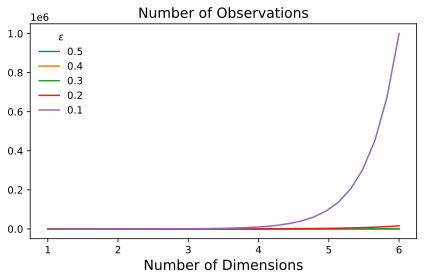

In [4]:
#@title **Number of Observations** { display-mode: "form" }
def point(e,d):
  return (1/e)**d

ps = jnp.array([0.5, 0.4, 0.3, 0.2, 0.1])
ds = jnp.linspace(1, 6, 30)
fig = plt.figure(dpi=300, tight_layout=True)
for i in ps:
  f = partial(point, i)
  y = f(ds)
  plt.plot(ds, y, label=i)
plt.legend(frameon=False, title=r'$\varepsilon$')
plt.title('Number of Observations', loc='center', size=14)
plt.xlabel('Number of Dimensions', size=14)
plt.show()

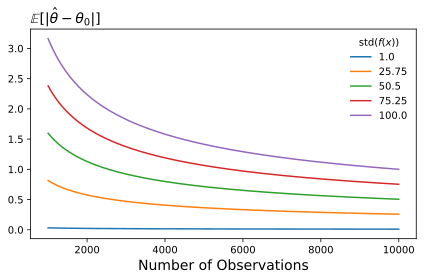

In [16]:
#@title **Convergence Rate** { display-mode: "form" }
def bound(std, n):
  return std/jnp.sqrt(n)

stds = jnp.linspace(1, 100, 5)
ns = jnp.arange(1000, 10000)
fig = plt.figure(dpi=300, tight_layout=True)
for i in stds:
  f = partial(bound, i)
  ys = f(ns)
  plt.plot(ns, ys, label=i)
plt.legend(frameon=False, title=r'std$(f(x))$')
plt.title(r'$\mathbb{E}[|\hat{\theta} - \theta_0 |]$', loc='left', size=14)
plt.xlabel('Number of Observations', size=14)
plt.show()

\begin{align*}
\textrm{var}(f(x)) \quad \textrm{as dim}(x) \to \infty 
\end{align*}

In [ ]:
def sample(key, n):
  xs = jax.random.uniform(key, shape=(n,), minval=0., maxval=1.)
  return jnp.sum(jax.vmap(jnp.sin)(xs))

In [ ]:
results = [] 
for i in range(1, 30):
  keys = jax.random.split(jax.random.PRNGKey(0), 50000)
  vals = jax.vmap(partial(sample, n=i))(keys)
  results.append(jnp.mean((vals - jnp.mean(vals))**2))

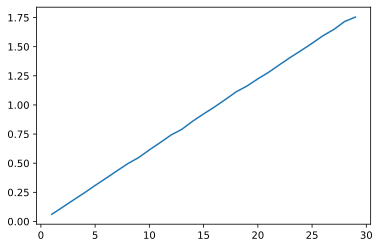

In [ ]:
plt.plot(range(1, 30), results)
plt.show()